In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from tqdm.auto import tqdm

os.chdir("../")
import json

import sys

sys.path.append("scripts")
from pathlib import Path

In [2]:
import utils
import distclassipy as dcpy

In [3]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
seed_val = settings_dict["seed_choice"]
np.random.seed(seed_val)
sns_dict = settings_dict["sns_dict"]
sns.set_theme(**sns_dict)

In [4]:
all_metrics = settings_dict["all_metrics"]

In [33]:
for metric in tqdm(all_metrics, desc="Metric", leave=True):
    metric_str = utils.get_metric_name(metric)
    locpath = os.path.join("results", metric_str)
    res_df = pd.read_csv(f"{locpath}/efs_allfeatures.csv").set_index("feature_names")
    res_df = res_df[["avg_score"]]
    break

Metric:   0%|          | 0/18 [00:00<?, ?it/s]

In [125]:
summary_df = pd.DataFrame(index=res_df.index)

for metric in tqdm(all_metrics, desc="Metric", leave=True):
    metric_str = utils.get_metric_name(metric)
    locpath = os.path.join("results", metric_str)
    res_df = pd.read_csv(f"{locpath}/efs_allfeatures.csv").set_index("feature_names")
    summary_df[f"{metric_str}_score"] = res_df["avg_score"]

Metric:   0%|          | 0/18 [00:00<?, ?it/s]

In [126]:
summary_df["allmetrics_avg"] = summary_df.mean(axis=1)
summary_df["allmetrics_std"] = summary_df.std(axis=1)

In [127]:
summary_df = summary_df.loc[:, ["allmetrics_avg", "allmetrics_std"]]

In [128]:
summary_df = summary_df.sort_values(by="allmetrics_avg", ascending=False)

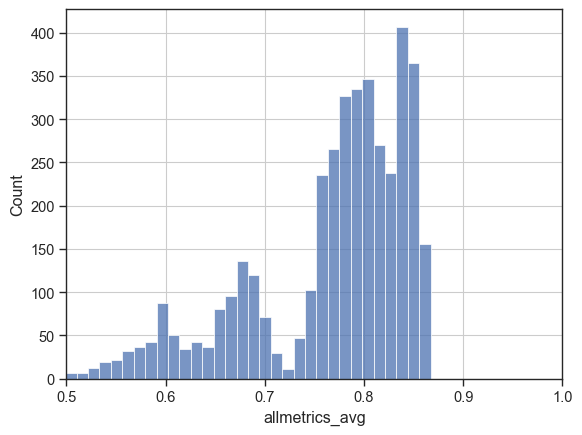

In [129]:
sns.histplot(summary_df["allmetrics_avg"])
plt.xlim(0.5, 1)
plt.show()

In [130]:
feats = []
featlen = []
for ind in tqdm(range(summary_df.shape[0])):
    curfeats = list(ast.literal_eval(summary_df.index[ind]))
    feats.append(curfeats)
    featlen.append(len(curfeats))

  0%|          | 0/4095 [00:00<?, ?it/s]

In [131]:
summary_df["feats_length"] = featlen

In [132]:
summary_df = summary_df.reset_index(drop=False)

In [151]:
summary_df[(summary_df["allmetrics_avg"] - summary_df["allmetrics_std"]) > 0.72]

,feature_names,allmetrics_avg,allmetrics_std,feats_length
0,"('Harmonics_phase_2_i', 'SPM_A_Y', 'Multiband_...",0.867159,0.140450,8
1,"('Harmonics_phase_2_i', 'SPM_A_Y', 'Multiband_...",0.866628,0.138669,9
2,"('Harmonics_phase_2_i', 'SPM_A_Y', 'Multiband_...",0.866617,0.136991,10
3,"('Harmonics_phase_2_i', 'SPM_A_Y', 'Multiband_...",0.866358,0.138610,9
4,"('SPM_A_Y', 'Multiband_period', 'r-i', 'i-z', ...",0.865962,0.139534,9
5,"('SPM_A_Y', 'Multiband_period', 'r-i', 'i-z', ...",0.865617,0.140611,8
7,"('SPM_A_Y', 'Multiband_period', 'r-i', 'i-z', ...",0.864721,0.137003,7
13,"('SPM_A_Y', 'Multiband_period', 'r-i', 'i-z', ...",0.863494,0.136674,8
16,"('SPM_A_Y', 'Multiband_period', 'r-i', 'i-z', ...",0.863017,0.141411,10
17,"('Harmonics_phase_2_i', 'SPM_A_Y', 'Multiband_...",0.862947,0.138713,11


In [157]:
final_features = list(ast.literal_eval(summary_df.iloc[51]["feature_names"]))

In [158]:
print(final_features)

['SPM_A_Y', 'Multiband_period', 'r-i', 'Harmonics_phase_4_i', 'Harmonics_phase_2_r', 'Power_rate_4']
